In [1]:
import os

# import pickle, re
import numpy as np
import xml.etree.ElementTree as ET
import PIL

from IPython.display import Image
# from PIL import Image
from matplotlib import image, pyplot

%load_ext autoreload
%aimport helpers

from inkml2img import inkml2img

# Collect all data

In [2]:
# All inkml files are divided into various folders under 'data/'

BASE_PATH = 'data'
dirs = os.listdir(BASE_PATH)

train_dirs = []
test_dirs = []
for d in dirs:
    if 'train' in d.lower():
        train_dirs.append(d)
    if 'test' in d.lower():
        test_dirs.append(d)
        
print('Training samples grabbed from:', train_dirs)
print('Test samples grabbed from:', test_dirs)

Training samples grabbed from: ['trainData_2012_part1', 'MatricesTrain2014', 'CROHME_training_2011', 'trainData_2012_part2', 'TrainINKML_2013']
Test samples grabbed from: ['TestINKML_2013', 'MatricesTest2014', 'testData_2012', 'CROHME_test_2011']


## Separate training data

In [3]:
# Create list of files in directory
def get_file_list(directories, base_path='data/'):
    files = []
    for directory in directories:
        path = os.path.join(BASE_PATH, directory)
        files.extend([os.path.join(path, file) for file in os.listdir(path) if file.endswith(".inkml")])
    return files

train_files = get_file_list(train_dirs)
test_files = get_file_list(test_dirs)
print('Total number of samples:', len(train_files))
print('Test set files:', len(test_files))

Total number of samples: 11350
Test set files: 1629


## Globals

In [4]:
max_dims = 322, 484
unconvertable = []
X_png_paths = [] # list of png file paths
Y = [] # for labels
X = []

## Helper functions

In [5]:
# def create_image_path(inkml_path):
#     img_path = re.sub(r'../data/handwritten-math/', '', inkml_path)
#     img_path = re.sub(r'/', '_', img_path)
#     img_path = re.sub(r'.inkml', '', img_path)
#     img_path = 'images/' + img_path + '.png'
#     return img_path

# # Gets the latex label from the tree of a parsed inkml file
# def get_label(file):
#     root = ET.parse(file).getroot()
#     ANNOTATION = '{http://www.w3.org/2003/InkML}annotation'

#     for node in root.findall(ANNOTATION):
#         if node.get('type') == 'truth':
#             label = node.text

#             # Strip off $'s
#             label = re.sub(r"^\$", '', label)
#             label = re.sub(r'\$$', '', label)
            
#             return {'inkml_file': file, 'label': label}

#     return None

# # Attempts to extract a label and png image from a list of inkml files
# # Creates the pngs and label dictionaries

# def extract_labels(inkml_files):
#     for file in inkml_files:
#         try:
#             label = get_label(file)
#         except:
#             print('Could not get label of', file)
#             unconvertable.append(i)
#             continue

#         # Update global
#         Y.append(label)

# def make_images_from_valid_labels(Y):
#     to_delete = []
#     for i, y in enumerate(Y):
#         outfile = create_image_path(file)
#         file = y['inkml_path']
#         try:
#             inkml2img(file, outfile)
#         except:
#             print('Could not convert', file)
#             unconvertable.append(i)
#             to_delete.append(i)
#             continue
        
#         # Update globals
#         y.update({'image_path': outfile})

        
# def generate_images(Y):
#     for i, y in enumerate(Y):
#         # Create a unique filename
#         inkml_file = y['inkml_file']
#         outfile = create_image_path(inkml_file)

#         try:
#             inkml2img(inkml_file, outfile)
#         except:
#             print('Could not convert', inkml_file)
#             unconvertable.append(i)
#             continue
        
#         # Update globals
#         y.update({'image_path': outfile})


# def remove_invalid_labels(deletions):
#     for i in sorted(deletions, reverse=True):
#         del Y[i]

        
# def get_max_dims(image_paths):
#     heights = [image.imread(file).shape[0] for file in image_paths]
#     widths = [image.imread(file).shape[1] for file in image_paths]
#     return max(heights), max(widths)

# def process_images(image_paths):
    
#     for path in image_paths:
#         # Convert to grayscale
#         TEMP_FILE = 'temp_gs_conversion.png'

#         img = PIL.Image.open(path)
#         gs_img = img.convert(mode='L')
#         gs_img.save(TEMP_FILE)

#         # Convert to np.array
#         img_array = image.imread(TEMP_FILE)
#         img_array = normalize_image_dims(arr=img_array, max_dims=max_dims)
#         X.append(img_array)
#         os.remove(TEMP_FILE)
        
# def normalize_image_dims(arr, max_dims): 
#     shape = arr.shape

#     for i in range(2):
#         diff = max_dims[i] - shape[i]
#         if diff != 0:
#             size = [0, 0]
#             size[i] = diff
#             size[1-i] = max_dims[1-i]
            
#             arr = np.append(arr, np.ones(size), axis=i)
            
#     return arr

In [6]:
len(Y)

0

## Execute preprocessing

In [15]:
%autoreload 1


labels, files_converted, problem_files = helpers.generate_dataset(train_files[:1003])

Could not convert data/MatricesTrain2014/40_gt_2.inkml
Could not convert data/MatricesTrain2014/20_gt_1.inkml
Could not convert data/MatricesTrain2014/45_gt_4.inkml
Could not convert data/MatricesTrain2014/10_gt_4.inkml
Could not convert data/MatricesTrain2014/15_gt_0.inkml
Could not convert data/MatricesTrain2014/20_gt_3.inkml
Could not convert data/MatricesTrain2014/40_gt_4.inkml
Could not convert data/MatricesTrain2014/15_gt_4.inkml
Could not convert data/MatricesTrain2014/25_gt_3.inkml
Could not convert data/MatricesTrain2014/10_gt_2.inkml
Could not convert data/MatricesTrain2014/25_gt_1.inkml
Could not convert data/MatricesTrain2014/45_gt_2.inkml
Could not convert data/MatricesTrain2014/20_gt_2.inkml
Could not convert data/MatricesTrain2014/40_gt_1.inkml
Could not convert data/MatricesTrain2014/15_gt_1.inkml
Could not convert data/MatricesTrain2014/40_gt_3.inkml
Could not convert data/MatricesTrain2014/20_gt_0.inkml
Could not convert data/MatricesTrain2014/15_gt_3.inkml
Could not 

<Figure size 432x288 with 0 Axes>

\int \left( 2^{x} - 3 e^{x} \right) d x


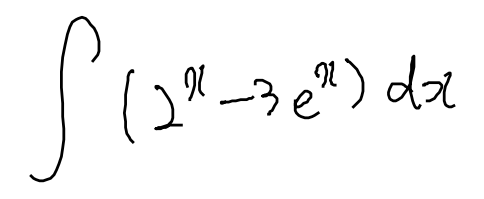

In [16]:

print(labels[-1])
Image(files_converted[-1])

In [ ]:
generate_images(Y)

In [ ]:
remove_invalid_labels(unconvertable)
len(Y)

In [ ]:
# Check our labels are still in sync with our file paths
print(Y[-1]['label'])
Image(filename=Y[-1]['image_path']) 

In [ ]:
# Make a list of image file paths for valid labels
image_paths = [y['image_path'] for y in Y]

In [ ]:
# Convert images to greyscale & normalize
process_images(image_paths)

## Check that all image arrays in X are the same size, max_dims

In [ ]:
check = [True if x.shape == max_dims else False for x in X]

# Is it all true?
errors = sum(check) - len(check)
print(errors)

In [ ]:
# Check that X and Y labels are in sync
print(Y[-1]['label'])
plt.imshow(X[-1])

## Save the training array data

In [ ]:
if errors == 0:
    pickle.dump(X, open('train_X.p', 'wb'))
    pickle.dump(Y, open('train_Y.p', 'wb'))
    
    SMALL_N = 100
    pickle.dump(X[:SMALL_N], open('train_X_small.p', 'wb'))
    pickle.dump(Y[:SMALL_N], open('train_Y_small.p', 'wb'))

In [ ]:
pickle.dump(small_X, open('train_X_small', 'wb'))
pickle.dump(small_Y, open('train_Y_small', 'wb'))